<a href="https://colab.research.google.com/github/jayasankha1010/Machine_learning_with_python/blob/master/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt


In [4]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-06-07 19:05:26--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.03s   

2020-06-07 19:05:27 (2.15 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [5]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.shape

(1067, 13)

In [7]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


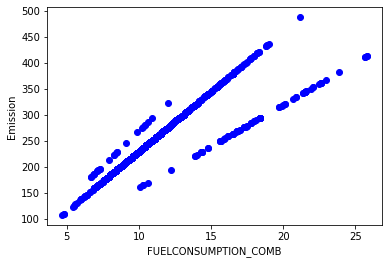

In [8]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

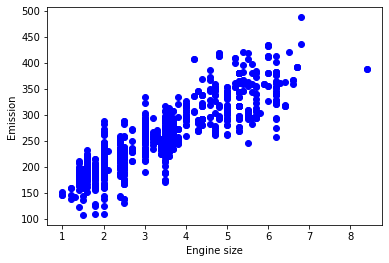

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

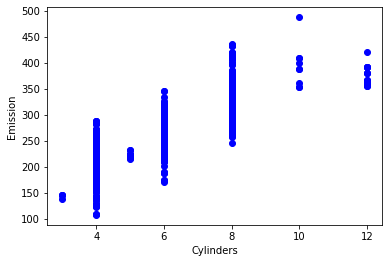

In [10]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Cylinders')
plt.ylabel('Emission')
plt.show()

In [0]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [16]:
train.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230


In [17]:
test.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
8,3.7,6,11.6,267
14,4.7,8,14.7,338
18,5.9,12,15.6,359
21,2.0,4,9.3,214


In [21]:
train.shape

(848, 4)

In [22]:
test.shape

(219, 4)

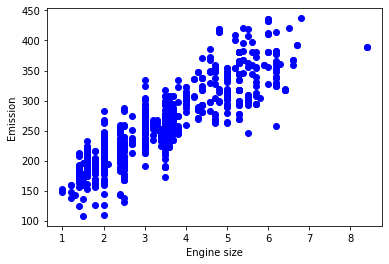

In [24]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [0]:
from sklearn import linear_model


In [27]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x,train_y)

print('Coefficients: ',regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[39.24565822]]
Intercept:  [125.13486015]


Text(0, 0.5, 'Emission')

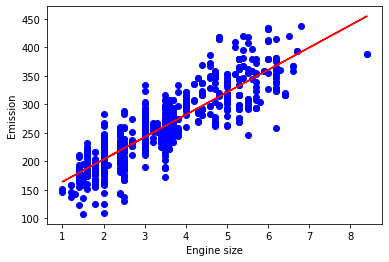

In [35]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Engine size')
plt.ylabel('Emission')

In [0]:
from sklearn.metrics import r2_score

In [37]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )


Mean absolute error: 23.49
Residual sum of squares (MSE): 1047.05
R2-score: 0.68


In [38]:
test_y_hat - test_y

array([[  -2.31575634],
       [ -28.41054621],
       [  -8.12816518],
       [ -15.12816518],
       [ -15.12816518],
       [ -38.37382341],
       [-117.03337532],
       [ -79.7877171 ],
       [-117.03337532],
       [  -7.88250696],
       [ -19.12816518],
       [   1.11749304],
       [ -49.12816518],
       [ -33.37382341],
       [ -14.88250696],
       [ -37.88250696],
       [  10.62617659],
       [  12.87183482],
       [  14.87183482],
       [   1.62617659],
       [  10.87183482],
       [   5.81575633],
       [   5.81575633],
       [   4.60880948],
       [   5.81575633],
       [ -19.18424367],
       [ -40.18424367],
       [ -19.18424367],
       [  -5.37382341],
       [ -23.58077025],
       [ -15.92121834],
       [  30.32443988],
       [ -24.37382341],
       [   6.41922975],
       [ -12.12816518],
       [ -13.54205887],
       [  28.45794113],
       [  46.45794113],
       [  14.45794113],
       [ -23.58077025],
       [  74.45794113],
       [  76.457